In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Poll_answers.csv')

#### Data preprocessing

In [3]:
data = data.drop(['Отметка времени','Any other comments:'],axis=1)

In [4]:
data.columns

Index(['Which LSST collaboration or related group you are a part of?',
       'What is your career stage?',
       'Did you ever receive any formal programming or software development training?',
       'If you had a formal programming or software development training, which languages did it cover?',
       'How often on average do you write code?',
       'Which programming languages do you use most often?',
       'Which Integrated Development Environment(s) (IDEs) do you use, if any? (e.g. Jupyter Notebook, PyCharm, Spyder, Visual Studio...)',
       'Do you use git repositories?', 'Do you use git branches?',
       'Do you write unit tests?',
       'Do you use linters or code auto-formatters?',
       'Do you write some kind of software documentation (e.g. using Sphinx)?',
       'Do you use debuggers?',
       'Do you use collaborative GitHub tools (e.g. pull requests and issues)?',
       'Do you often work on some software collaboratively (e.g. develop specific features of a la

In [5]:
data = data.rename({'Which LSST collaboration or related group you are a part of?':'LSST affiliation',
       'What is your career stage?':'stage',
       'Did you ever receive any formal programming or software development training?':'training',
       'If you had a formal programming or software development training, which languages did it cover?':'lang_training',
       'How often on average do you write code?':'freq_coding',
       'Which programming languages do you use most often?':'lang_freq',
       'Which Integrated Development Environment(s) (IDEs) do you use, if any? (e.g. Jupyter Notebook, PyCharm, Spyder, Visual Studio...)':'IDE',
       'Do you use git repositories?':'git_repo', 'Do you use git branches?':'git_branch',
       'Do you write unit tests?':'unit_test',
       'Do you use linters or code auto-formatters?':'linters',
       'Do you write some kind of software documentation (e.g. using Sphinx)?':'soft_doc',
       'Do you use debuggers?':'debuggers',
       'Do you use collaborative GitHub tools (e.g. pull requests and issues)?':'git_PRs',
       'Do you often work on some software collaboratively (e.g. develop specific features of a large software project or engage in code review)?':'collab_coding',
       'Are you familiar with programming paradigms (e.g. Functional, Procedural, Object-Oriented)?':'paradigms',
       'Do you write Software Requirements and/or Design documents?':'SDDs',
       'Any other software development tools or best practices that you use and consider to be worth learning?':'notes'},axis=1)

In [6]:
data.columns

Index(['LSST affiliation', 'stage', 'training', 'lang_training', 'freq_coding',
       'lang_freq', 'IDE', 'git_repo', 'git_branch', 'unit_test', 'linters',
       'soft_doc', 'debuggers', 'git_PRs', 'collab_coding', 'paradigms',
       'SDDs', 'notes'],
      dtype='object')

In [7]:
aff = [s.split(', ') for s in list(data['LSST affiliation'])]
aff = [l for af in aff for l in af]

In [8]:
pd.DataFrame(aff,columns=['aff']).value_counts()

aff                                
Transients and Variable Stars          23
Galaxies                                9
Informatics and Statistics              8
Dark Energy                             7
Milky Way                               6
Stars                                   6
and Local Volume                        6
Strong Lensing                          4
Alerts Broker (specify below which)     4
Active Galactic Nuclei                  3
Solar System                            2
ALeRCE                                  2
IDAC developer                          1
LINCC                                   1
RSP developer                           1
Rubin DM                                1
Fink                                    1
Telescope & Site Software               1
The ALeRCE Broker                       1
Name: count, dtype: int64

In [9]:
data = data.replace({'training':{'No, self-learning only':'self-learn','Yes, university courses as part of the general curriculum':'uni courses',
                         'Yes, short workshops or courses (<6 month of duration summarily)': 'short courses',
                         'Yes, I have a software development-related university degree':'uni degree'}})

In [10]:
data = data.replace({'stage':{'Undergraduate student (bachelor, master)':'0_undergrad',
                              'PhD student':'1_Phd', 'Postdoc':'2_Postdoc','Tenure track position':'3_tenureTrk',
                              'Permanent position':'4_permanent',
                                'Software Engineer':'5_softEngnr',
                                'Machine Learning Engineer (staff, not in academic track)':'5_softEngnr',
                                'Software engineer':'5_softEngnr',
                                }})

In [11]:
data['stage'].value_counts()

stage
4_permanent    15
2_Postdoc      10
1_Phd           9
5_softEngnr     4
3_tenureTrk     3
0_undergrad     2
Name: count, dtype: int64

In [12]:
data = data.sort_values(by='stage')

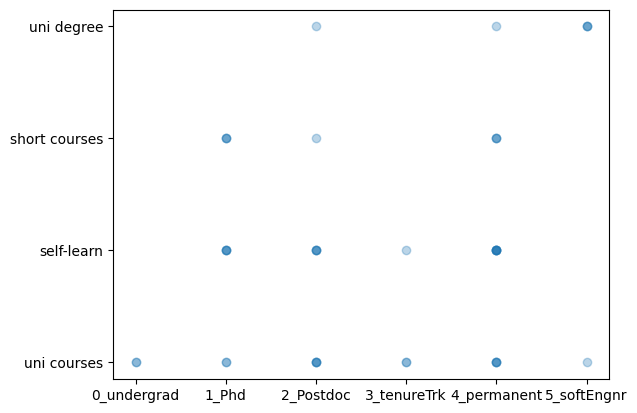

In [13]:
plt.scatter(data['stage'],data['training'],alpha=0.3)

In [15]:
cols = ['freq_coding','git_repo','git_branch','unit_test','linters','soft_doc','debuggers','git_PRs','collab_coding','paradigms','SDDs']
for c in sorted(cols):
    print(c,': ',list(data[c].unique()))

SDDs :  ['I heard about this, but never wrote one', 'I write them for some of my projects', 'Never heard of it', 'I write them for all of my projects']
collab_coding :  ['Sometimes', 'All the time', 'Never', 'It happed on a few occasions']
debuggers :  ['Know about their existence, never used it', 'Use them all the time', 'Never heard of them', 'Use them rarely', 'Use them from time to time']
freq_coding :  ['Almost every day', 'Couple times per week', 'Almost never', 'Several times per month']
git_PRs :  ['Use it from time to time', 'Use them all the time', 'Use it rarely', 'Know about its existence, never used it', 'Never heard of it']
git_branch :  ['Use it from time to time', 'Use them all the time', 'Know about its existence, never used it', 'Use it rarely', 'Never heard of it']
git_repo :  ['Use it from time to time', 'Use them all the time', 'Use it rarely', 'Know about its existence, never used it']
linters :  ['Use it rarely', 'Use them all the time', 'Never heard of it', 'Kno

In [16]:
data_enc = data.replace(to_replace=r'.*ll the time', value=4, regex=True).replace(to_replace=r'.*every day', value=4, regex=True).replace(to_replace=r'.* most.*', value=4, regex=True)
data_enc = data_enc.replace(to_replace=r'.*ll of my project', value=4, regex=True)
data_enc = data_enc.replace(to_replace=r'.*can write code following one or another', value=4, regex=True)
data_enc = data_enc.replace(to_replace=r'.*vague understanding of.*', value=3, regex=True)
data_enc = data_enc.replace(to_replace=r'.*t know the difference.*', value=2, regex=True)

In [17]:
data_enc = data_enc.replace(to_replace=r'.*from time to time', value=3, regex=True).replace(to_replace='Couple times per week', value=3, regex=True).replace(to_replace=r'.*some.*', value=3, regex=True)
data_enc = data_enc.replace(to_replace=r'Several times per month', value=2, regex=True)
data_enc = data_enc.replace(to_replace=r'Sometimes', value=3, regex=True).replace(to_replace=r'.*few occasions', value=2, regex=True)
data_enc = data_enc.replace(to_replace=r'.*rarely', value=2, regex=True).replace(to_replace='.*Never.*', value=1, regex=True).replace(to_replace='.*never.*', value=1, regex=True)

/tmp/ipykernel_1000206/2787828252.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_enc = data_enc.replace(to_replace=r'.*rarely', value=2, regex=True).replace(to_replace='.*Never.*', value=1, regex=True).replace(to_replace='.*never.*', value=1, regex=True)


In [20]:
data_enc.to_csv('Poll_answers_encoded.csv',index=False)

#### Visualization

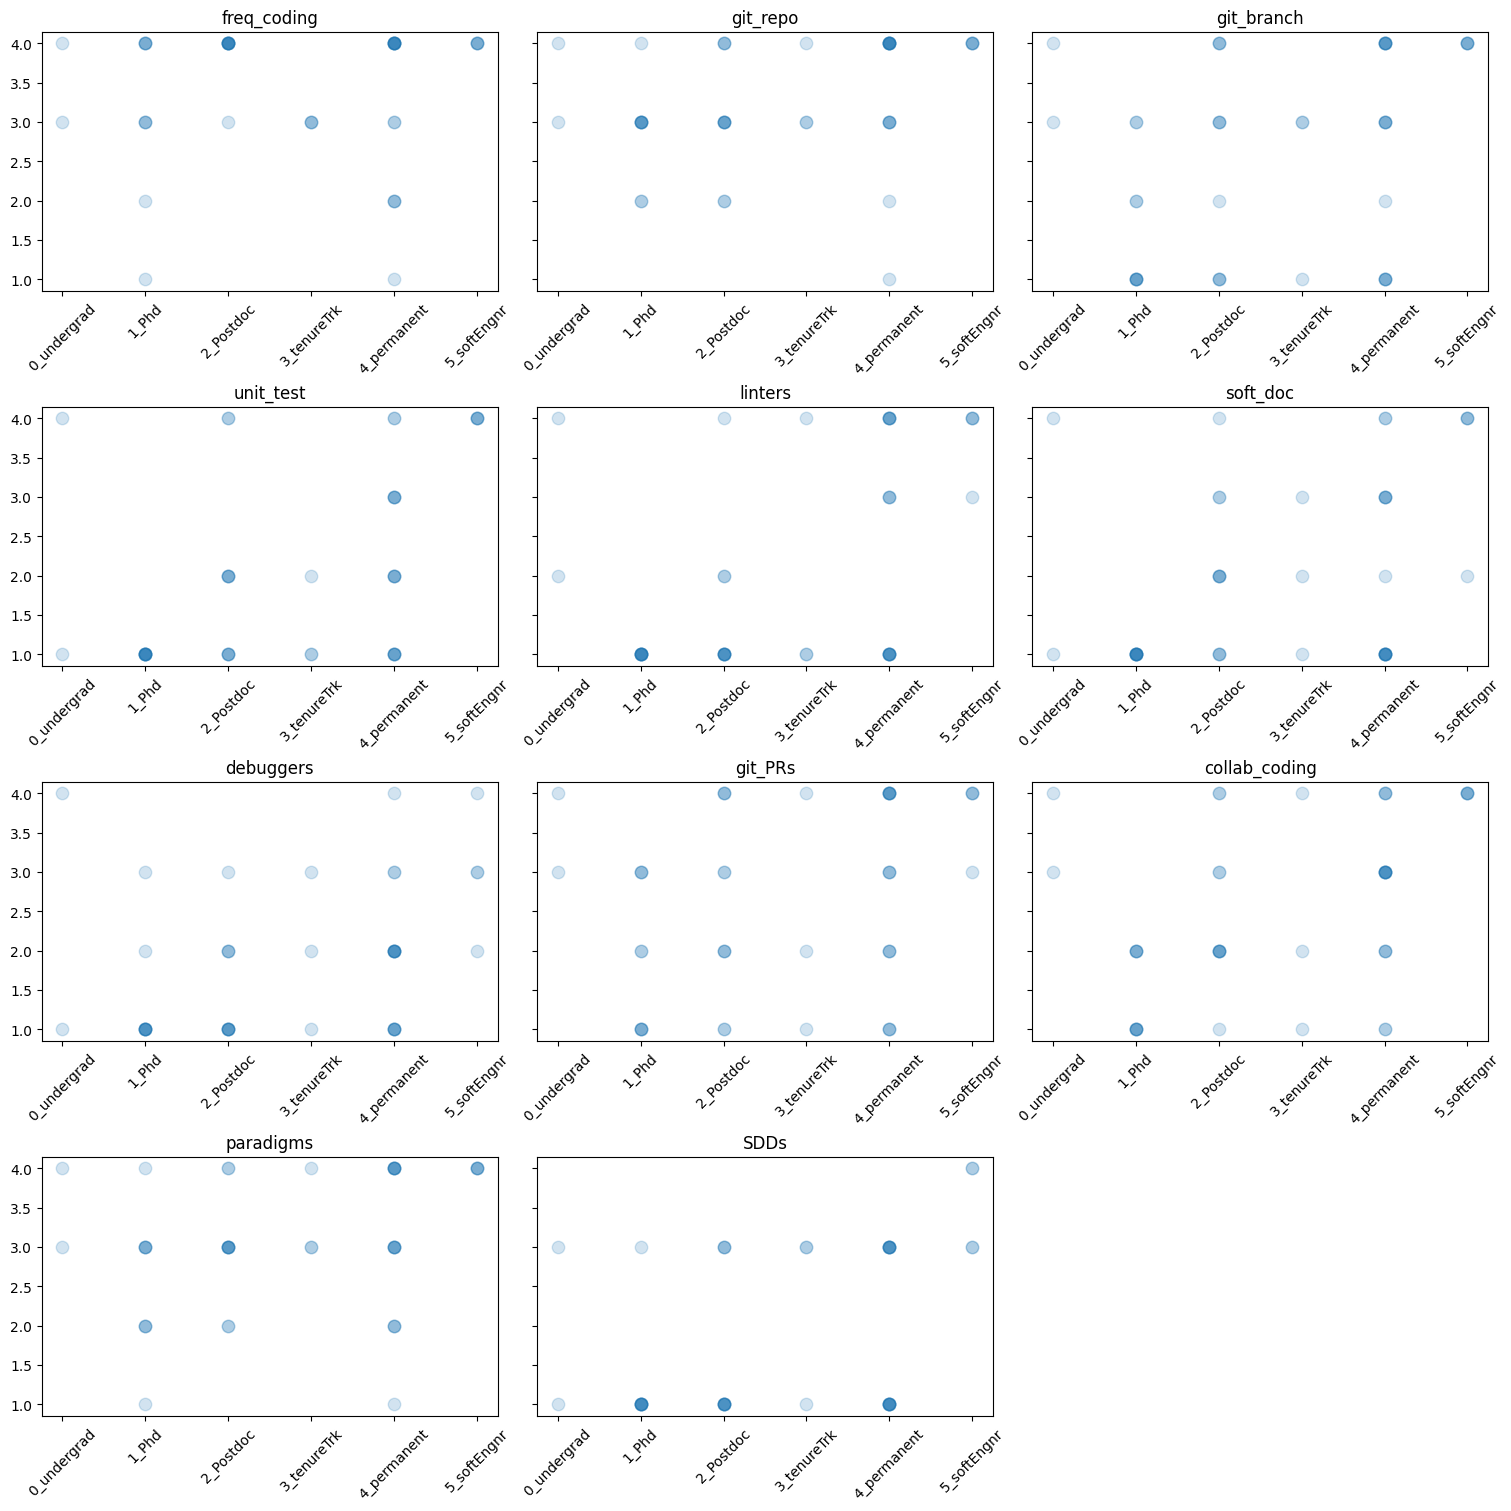

In [18]:
fig, axs = plt.subplots(nrows=len(cols)//3+1,ncols=3,figsize=(15,15),layout='constrained',sharey='row')
for i,col in enumerate(cols):
    ax = axs.flatten()[i]
    ax.scatter(data_enc['stage'],data_enc[col],alpha=0.2,s=80)
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title(col)
axs.flatten()[-1].set_visible(False)

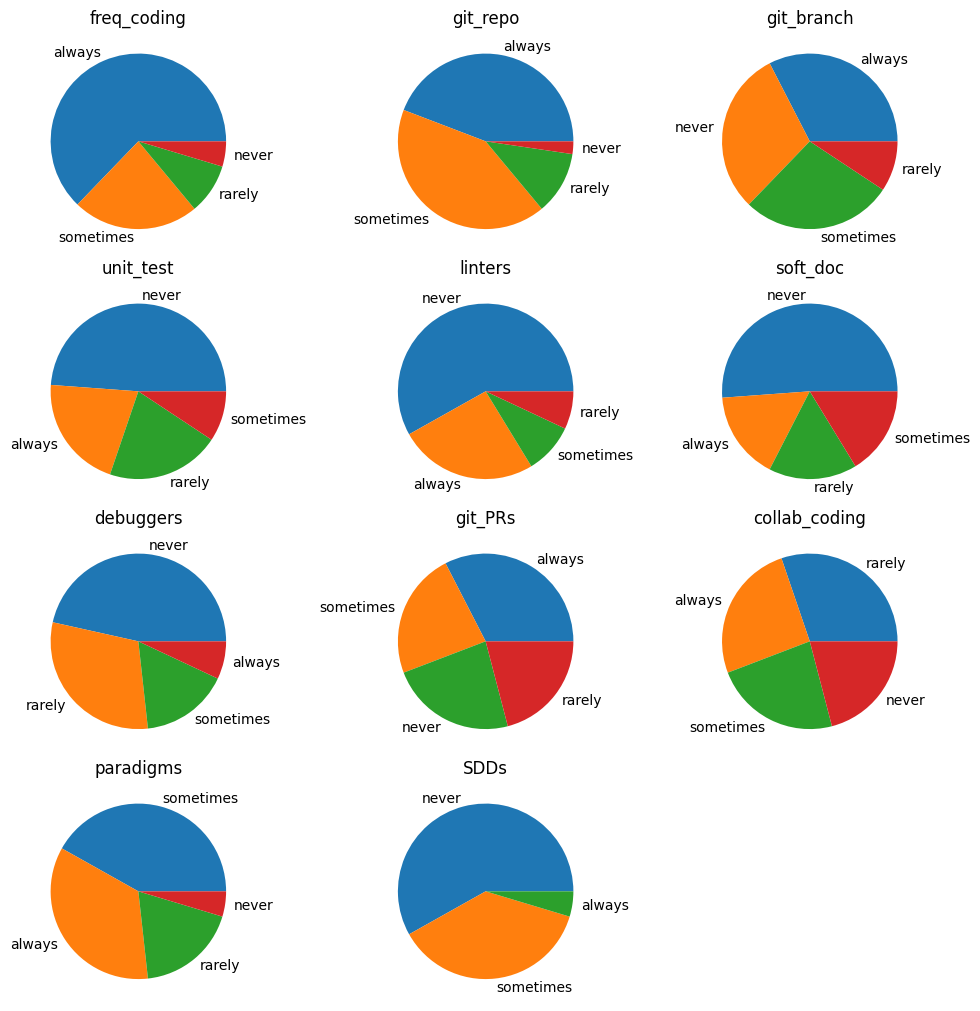

In [39]:
fig, axs = plt.subplots(nrows=len(cols)//3+1,ncols=3,figsize=(10,10),layout='constrained',sharey='row')
for i,col in enumerate(cols):
    ax = axs.flatten()[i]
    values = data_enc[col].value_counts().values
    labels = pd.Series(data_enc[col].value_counts().index)
    labels = list(labels.replace({1:'never',2:'rarely',3:'sometimes',4:'always'}))
    ax.pie(values,labels=labels)
    ax.set_title(col)
axs.flatten()[-1].set_visible(False)